In [1]:
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import sys

sys.path.append("../trimmingSession")
sys.path.append("~/.local/share/fonts")
from util import *
from stationUtil import *
from graph import *

len(subway_graph) == len(interval_time) :  True


In [2]:
import matplotlib.font_manager as fm

SHARE_PATH = "/usr/share/fonts"
font_name = fm.FontProperties(
    fname=f"{SHARE_PATH}/Pretendard/PretendardGOV-Medium.ttf"
).get_name()
plt.rc("font", family=font_name)

In [3]:
# THIS CODE FROM 11.ipynd

subway_graph_index, _ = fn_export_subway_graph(
    loadPickle(PATH_INTER_STATION_SPEND_TIME)
)
g_dist = dist_weight_graph()

f_list = glob("../trimmed_data/A001_20*.csv.*")
demand = [loadPickle(p) for p in f_list]


def od_metric(scode_start, scode_end):
    for d in demand:
        try:
            return d[(scode_start, scode_end)] + d[(scode_end, scode_start)]
        except:
            return 0


def unit_tranfer_flux_metric(scode_start, scode_end, g_dist=g_dist):
    UNITFACTOR_P1KM_TO_1KM = 1 / 10
    path_dist = (
        calc_total_path_weight(g_dist, scode_start, scode_end) * UNITFACTOR_P1KM_TO_1KM
    )
    path_od = od_metric(scode_start, scode_end)
    return path_dist * path_od

len(subway_graph) == len(interval_time) :  True


In [4]:
# Calc Flux Metric
flux_metric = []
s_namecode = loadPickle("../trimmed_data/stationNameCode.pickel").values()
for target_scode in s_namecode:
    arr = []
    for calc_scode in s_namecode:
        flux = unit_tranfer_flux_metric(target_scode, calc_scode)
        try:
            arr.append(flux)
        except:
            pass
    flux_metric.append([target_scode, sum(arr)])

df = pd.DataFrame(flux_metric, columns=["scode", "flux_metric"])
TRANFER_METRIC = df.sort_values(by="scode").reset_index(drop=True)
TRANFER_METRIC = TRANFER_METRIC.set_index("scode")

# 환승역
TRANFER_METRIC.loc[301] = TRANFER_METRIC.loc[208]
TRANFER_METRIC.loc[401] = TRANFER_METRIC.loc[309]

TRANFER_METRIC.head()

,flux_metric
scode,
95,3173245.0
96,2285062.6
97,2987031.8
98,1818186.4
99,2055180.6


(0.0, 19238463.04499999)

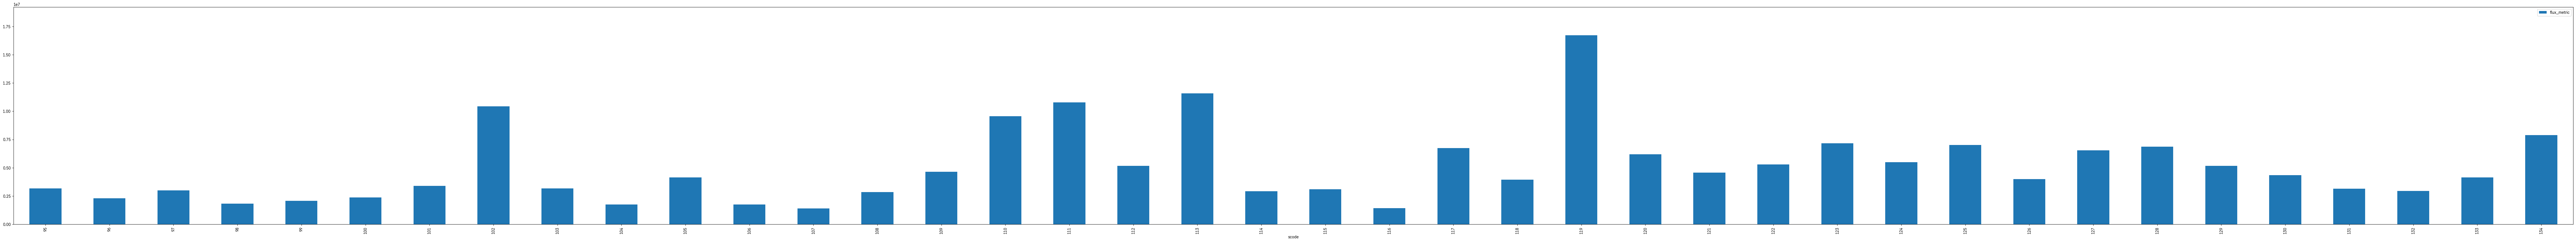

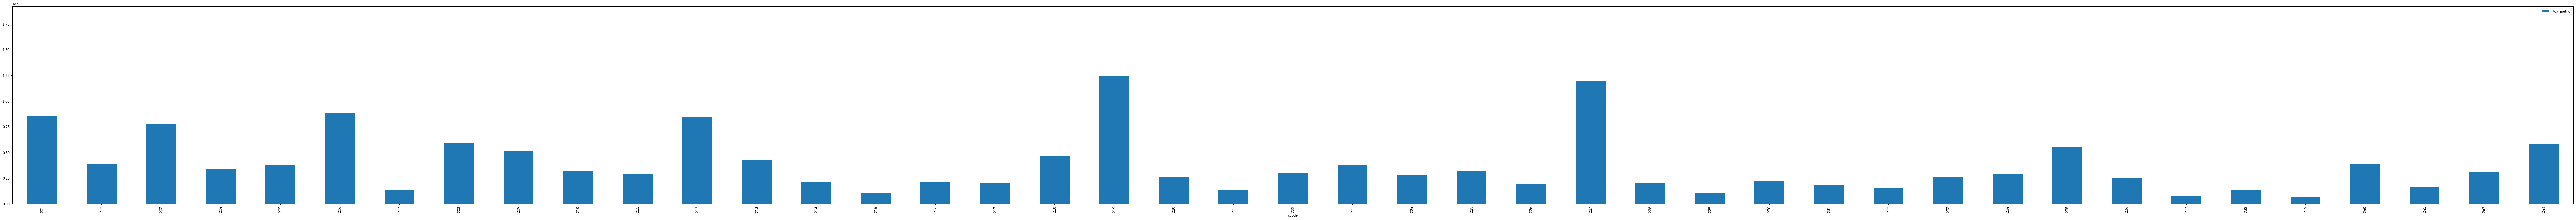

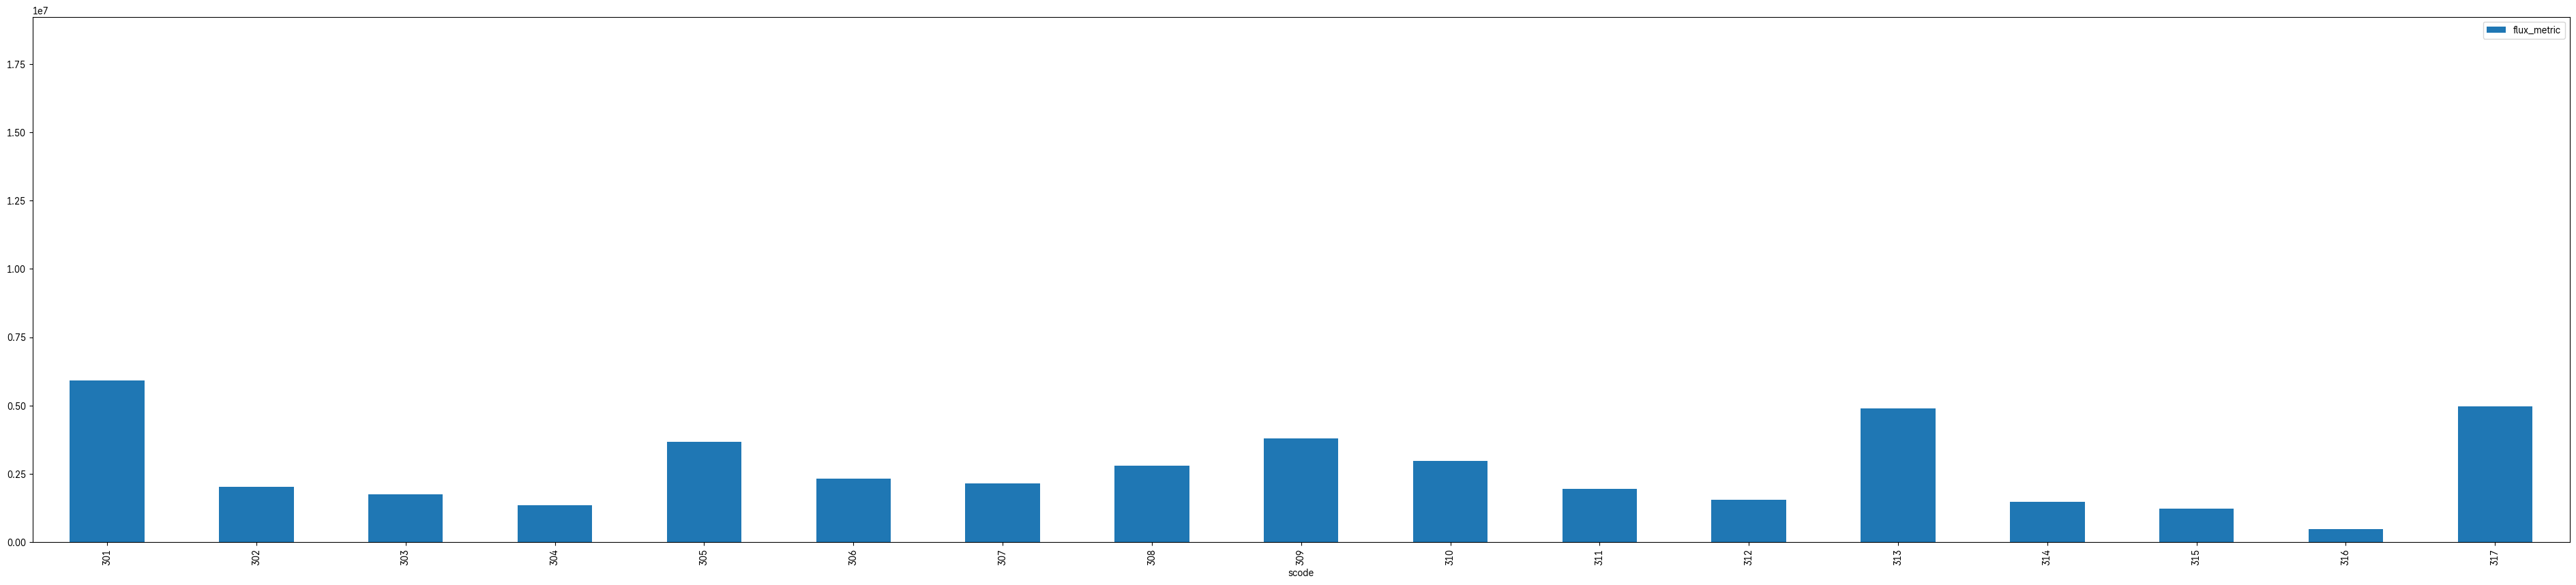

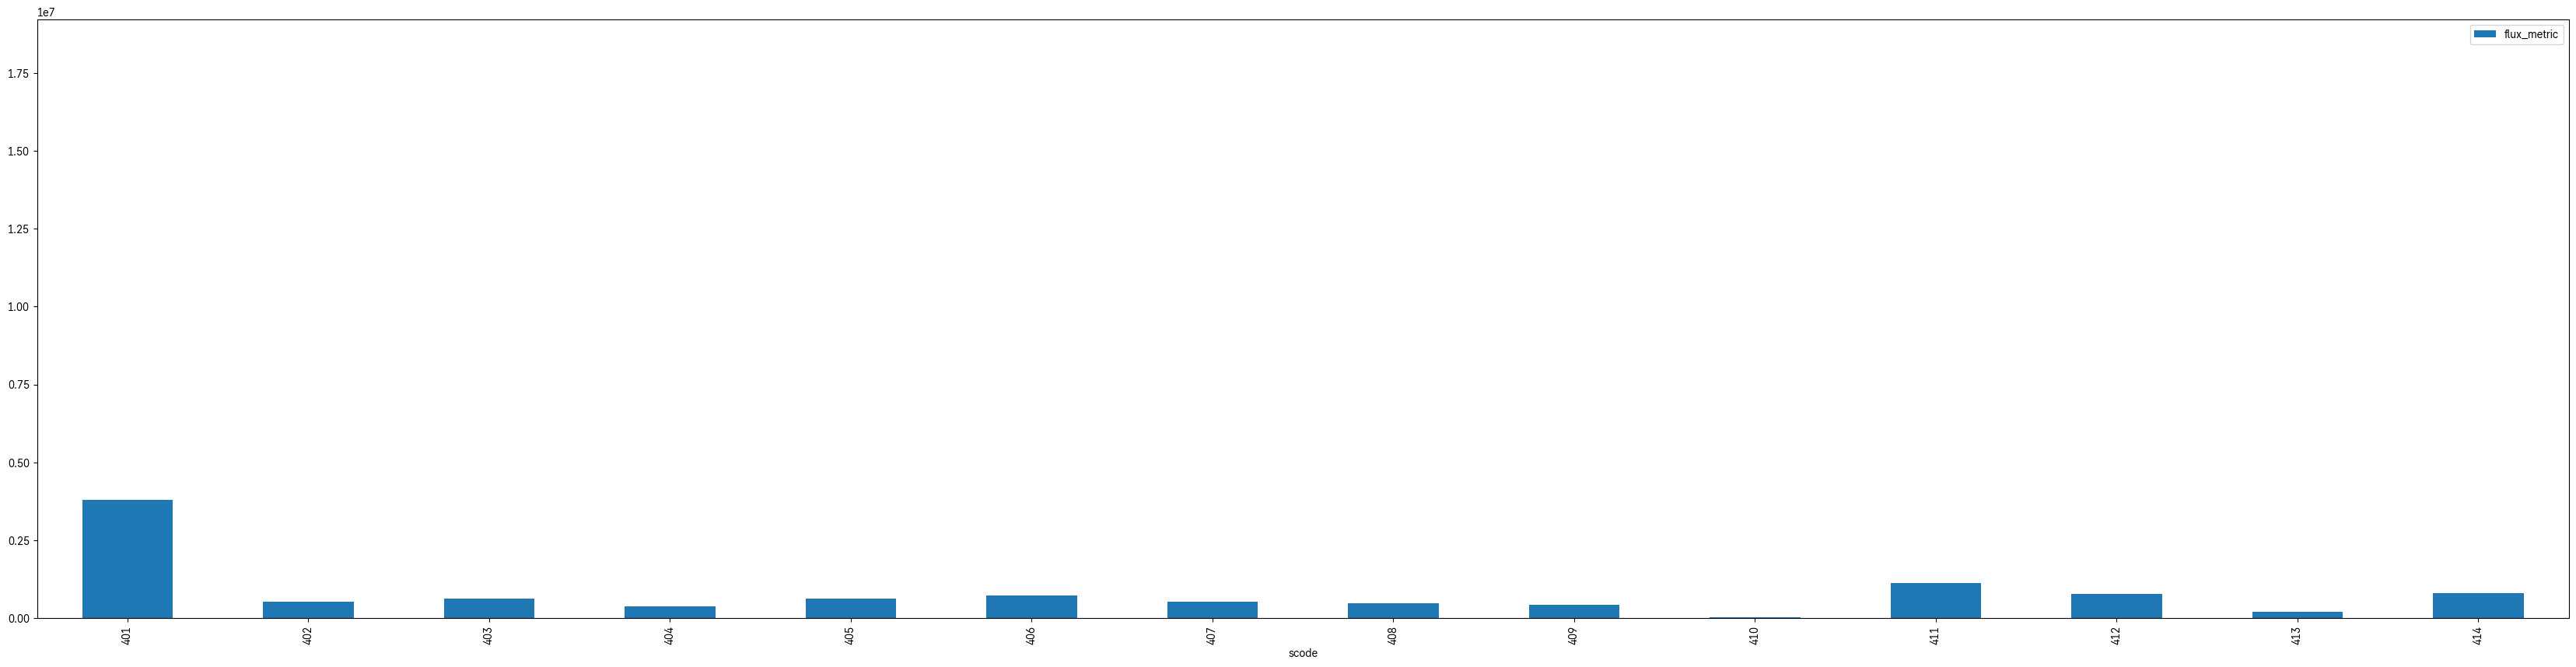

In [5]:

MAX_VALUE = max(TRANFER_METRIC.max().to_list()) *1.15

plt.rcParams["figure.figsize"] = (39 * 3, 10)
ax1 = TRANFER_METRIC.loc[95:200, :].plot.bar()
fig1 = ax1.get_figure()
ax1.set_ylim(0, MAX_VALUE)

plt.rcParams["figure.figsize"] = (43 * 3, 10)
ax2 = TRANFER_METRIC.loc[201:300, :].plot.bar()
fig2 = ax2.get_figure()
ax2.set_ylim(0, MAX_VALUE)

plt.rcParams["figure.figsize"] = (16 * 3, 10)
ax3 = TRANFER_METRIC.loc[301:400, :].plot.bar()
fig3 = ax3.get_figure()
ax3.set_ylim(0, MAX_VALUE)

plt.rcParams["figure.figsize"] = (14 * 3, 10)
ax4 = TRANFER_METRIC.loc[401:500, :].plot.bar()
fig4 = ax4.get_figure()
ax4.set_ylim(0, MAX_VALUE)

In [6]:
# Save File
figs = [-1, fig1, fig2, fig3, fig4]
for idx, f in enumerate(figs):
    if f == -1:
        continue
    f.savefig(f"line{idx}_transfer_metric.svg", format="svg")